# Volume 3: Metropolis. Solutions.

In [1]:
import numpy as np
from scipy import stats
from math import sqrt , exp, log
from matplotlib import pyplot as plt

## Problem 1

Write a function that accepts an integer $n$ and returns a random spin configuration for an $n \times n$ lattice (as an $n \times n$ NumPy array of $1$s and $-1$s).
Test your function with $n = 100$, plotting the spin configuration via `plt.imshow()`.

In [2]:
def random_lattice(n):
    """Construct a random spin configuration for an nxn lattice."""
    #raise NotImplementedError("Problem 1 Incomplete")
    A = np.random.binomial(1,0.5,size=(n,n))
    mask = A == 0
    A += (A-1)*mask
    return A

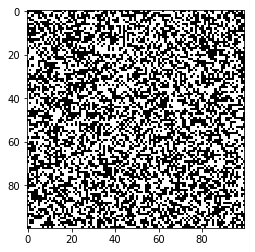

In [3]:
n=100
A = random_lattice(n)
plt.imshow(A,cmap='gray')
plt.show()

## Problem 2

Write a function that accepts a spin configuration $\sigma$ for a lattice as a NumPy array.
Compute the energy $H(\sigma)$ of the spin configuration.
Be careful to not double count site pair interactions!

In [4]:
def lattice_energy(L):
    """Computer the energy of the spin configuration corresponding to the
    lattice L.
    """
    #raise NotImplementedError("Problem 2 Incomplete")
    first_way = np.sum(L*np.sum(np.roll(L,1,axis=0),axis=0))
    second_way = np.sum(L*np.sum(np.roll(L,1,axis=1),axis=0))
    third_way = np.sum(L*np.sum(np.roll(L,-1,axis=0),axis=0))
    fourth_way = np.sum(L*np.sum(np.roll(L,-1,axis=1),axis=0))
    return first_way + second_way + third_way + fourth_way

## Problem 3

Write a function that accepts an integer $n$ and chooses a pair of indices $(i,j)$ where $0 \le i,j \le n-1$.
Each possible pair should have an equal probability $\frac{1}{n^2}$ of being chosen.

In [5]:
def flip_location(n):
    """Choose a random pair of indices 0 <= i,j <= n-1."""
    #raise NotImplementedError("Problem 3 Incomplete")
    return np.random.randint(0,n,2)

## Problem 4

Write a function that accepts a spin configuration $\sigma$, its energy $H(\sigma)$, and integer indices $i$ and $j$.
Compute the energy of the new spin configuration $\sigma^*$, which is $\sigma$ but with the spin flipped at the $(i,j)$th entry of the corresponding lattice.
Do not explicitly construct the new lattice for $\sigma^*$.

In [10]:
def updated_energy(L, L_energy, i, j):
    """Compute the energy of the spin configuration that results
    when the (i,j)th spin of L is flipped.
    """
    #raise NotImplementedError("Problem 4 Incomplete")
    n = L.shape[0]
    up = j-1
    down = j+1
    left = i-1
    right = i+1
    if i == 0 :
        left = -1
    elif i == n-1 :
        right = 0
    if j == 0 :
        up = -1
    elif j == n-1 :
        down = 0
    add = L[i,j]*(L[left,j]+L[right,j]+L[i,up]+L[i,down])
    return L_energy + 2*add

## Problem 5

Write a function that accepts a float $\beta$ and spin configuration energies $H(\sigma)$ and $H(\sigma^*)$.
Calculate whether or not the new spin configuration $\sigma^*$ should be accepted (return `True` or `False`).

In [7]:
def accept(beta, energy_old, energy_new):
    """Accept or reject the new spin configuration."""
    #raise NotImplementedError("Problem 5 Incomplete")
    val = True
    if energy_old <= energy_new :
        A = exp(beta*(energy_old-energy_new))
        a = np.random.uniform()
        val = a <= A
    return val

## Problem 6

Write a function that accepts a float $\beta>0$ and integers $n$, `n_samples`, and `burn_in`.
Initialize an $n\times n$ lattice for a spin configuration $\sigma$ using `random_lattice()`.
Use the Metropolis algorithm to (potentially) update the lattice `burn_in` times.
1. Use `flip_location()` to choose a site for possibly flipping the spin, thus defining a potential new configuration $\sigma^*$.
2. Use `updated_energy()` to calculate the energy $H(\sigma^*)$ of the proposed configuration.
3. Use `accept()` to accept or reject the proposed configuration. If it is accepted, set $\sigma = \sigma^*$ by flipping the spin at the indicated site.
4. Track $-\beta H(\sigma)$ at each iteration (independent of acceptance).

After the burn-in period, continue the iteration `n_samples` times, also recording every $100$th sample (to prevent memory failure).
Return the samples, the sequence of weighted energies $-\beta H(\sigma)$, and the acceptance rate.

Test your sampler on a $100 \times 100$ grid with $200000$ total iterations, with `n_samples` large enough so that you will keep $50$ samples, for $\beta = 0.2, 0.4, 1$.
Plot the proportional log probabilities, as well as a late sample from each test.


In [35]:
def ising_metropolis(beta, n=100, n_samples=5000, burn_in=195000):
    """Use the Metropolis algorithm to choose new spin configurations.

    Parameters:
        beta (float > 0): Constant inversely proportional to the temperature.
        N (int > 0): The size of the lattice.
        n_samples (int): The number of samples to generate.
        burnin (int): The number of iterations to burn before sampling.

    Returns:
        ((n_samples//100, n,n) ndarray): The sampled spin configurations.
        (n_samples+burn_in) ndarray: The weighted energies of each configuration.
        (float): The proportion of proposed samples that were accepted.
    """
    #raise NotImplementedError("Problem 6 Incomplete")
    accept_counter = 0
    laticies = []
    weights = []
    L = random_lattice(n)
    H_old = lattice_energy(L)
    for k in range(n_samples+burn_in):
        i,j = flip_location(n)
        H_new = updated_energy(L,H_old,i,j)
        acc = accept(beta,H_old,H_new)
        if acc :
            if k >= burn_in :
                accept_counter += 1
            L[i,j] = -L[i,j]
            H_old = H_new
        weights.append(-beta*H_old)
        if k >= burn_in and ((k-burn_in)%100) == 0 :
                laticies.append(L)
    return laticies, weights, accept_counter/n_samples

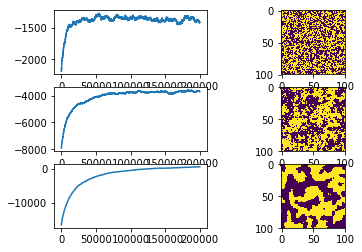

In [36]:
n = 100
n_samples = 5000
burn_in = 200000 - n_samples
betas = [0.2,0.4,1]
r = len(betas)
x = [i for i in range(1,200001)]
for i in range(r) :
    beta = betas[i]
    lats, weights, acc_rat = ising_metropolis(beta,n,n_samples,burn_in)
    plt.subplot(r,2,2*i+1)
    plt.plot(x,weights)
    plt.subplot(r,2,2*i+2)
    plt.imshow(lats[-1])
plt.show()